# Class Single Recording Code

In [1]:
import tdt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from single_tdt_class import *

In [2]:
single_recording_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac\n5-240821-085040"
behavior_csv_path = r"C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac_csvs\n5-240821-085040.csv"

## Bout Data from CSV

In [3]:
tdt_data = tdt.read_block(single_recording_path)
tdt_data_obj = TDTData(tdt_data, single_recording_path)

Found Synapse note file: C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac\n5-240821-085040\Notes.txt
read from t=0s to t=1324.06s


In [4]:
tdt_data_obj.remove_initial_LED_artifact(t=30)
tdt_data_obj.remove_final_data_segment(t = 10)
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*3)
tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.align_channels()
tdt_data_obj.compute_dFF()
tdt_data_obj.combine_consecutive_behaviors(behavior_name='all', bout_time_threshold=2, min_occurrences=1)
# tdt_data_obj.remove_short_behaviors(behavior_name='all', min_duration=0.5)

tdt_data_obj.compute_zscore(method = 'standard')
# tdt_data_obj.extract_manual_annotation_behaviors(behavior_csv_path)
tdt_data_obj.verify_signal()

In [5]:
tdt_data_obj.ag_extract_aggression_events(behavior_csv_path=behavior_csv_path)

Extracted 5 aggression events from C:\Users\alber\OneDrive\Desktop\PC_Lab\Photometry\Pilot_2\Combined\Aggression\nac_csvs\n5-240821-085040.csv.


In [24]:
tdt_data_obj.bout_dict

{'aggression_bout': {'Aggression': [{'Start Time': 593.4,
    'End Time': 596.9,
    'Duration': 3.5,
    'Mean zscore': np.float64(0.2741241759174585)},
   {'Start Time': 607.9,
    'End Time': 609.099,
    'Duration': 1.199,
    'Mean zscore': np.float64(-0.8986648504339215)},
   {'Start Time': 840.7,
    'End Time': 845.9,
    'Duration': 5.2,
    'Mean zscore': np.float64(-0.431642659620111)},
   {'Start Time': 1030.6,
    'End Time': 1033.8,
    'Duration': 3.2,
    'Mean zscore': np.float64(0.2903867440213543)},
   {'Start Time': 1035.9,
    'End Time': 1036.5,
    'Duration': 0.6,
    'Mean zscore': np.float64(0.06847755556028627)}]}}

## Plot Raw Trace

In [6]:
len(tdt_data_obj.streams['DA'])

1306125

In [7]:
# Remove initial LED artifact
tdt_data_obj.remove_initial_LED_artifact(t = 30)
len(tdt_data_obj.streams['DA'])

1306125

In [8]:
tdt_data_obj.remove_final_data_segment(t = 30)
len(tdt_data_obj.streams['DA'])

1275607

In [9]:
tdt_data_obj.remove_time_segment(90,130)

Removed time segment from 90s to 130s.


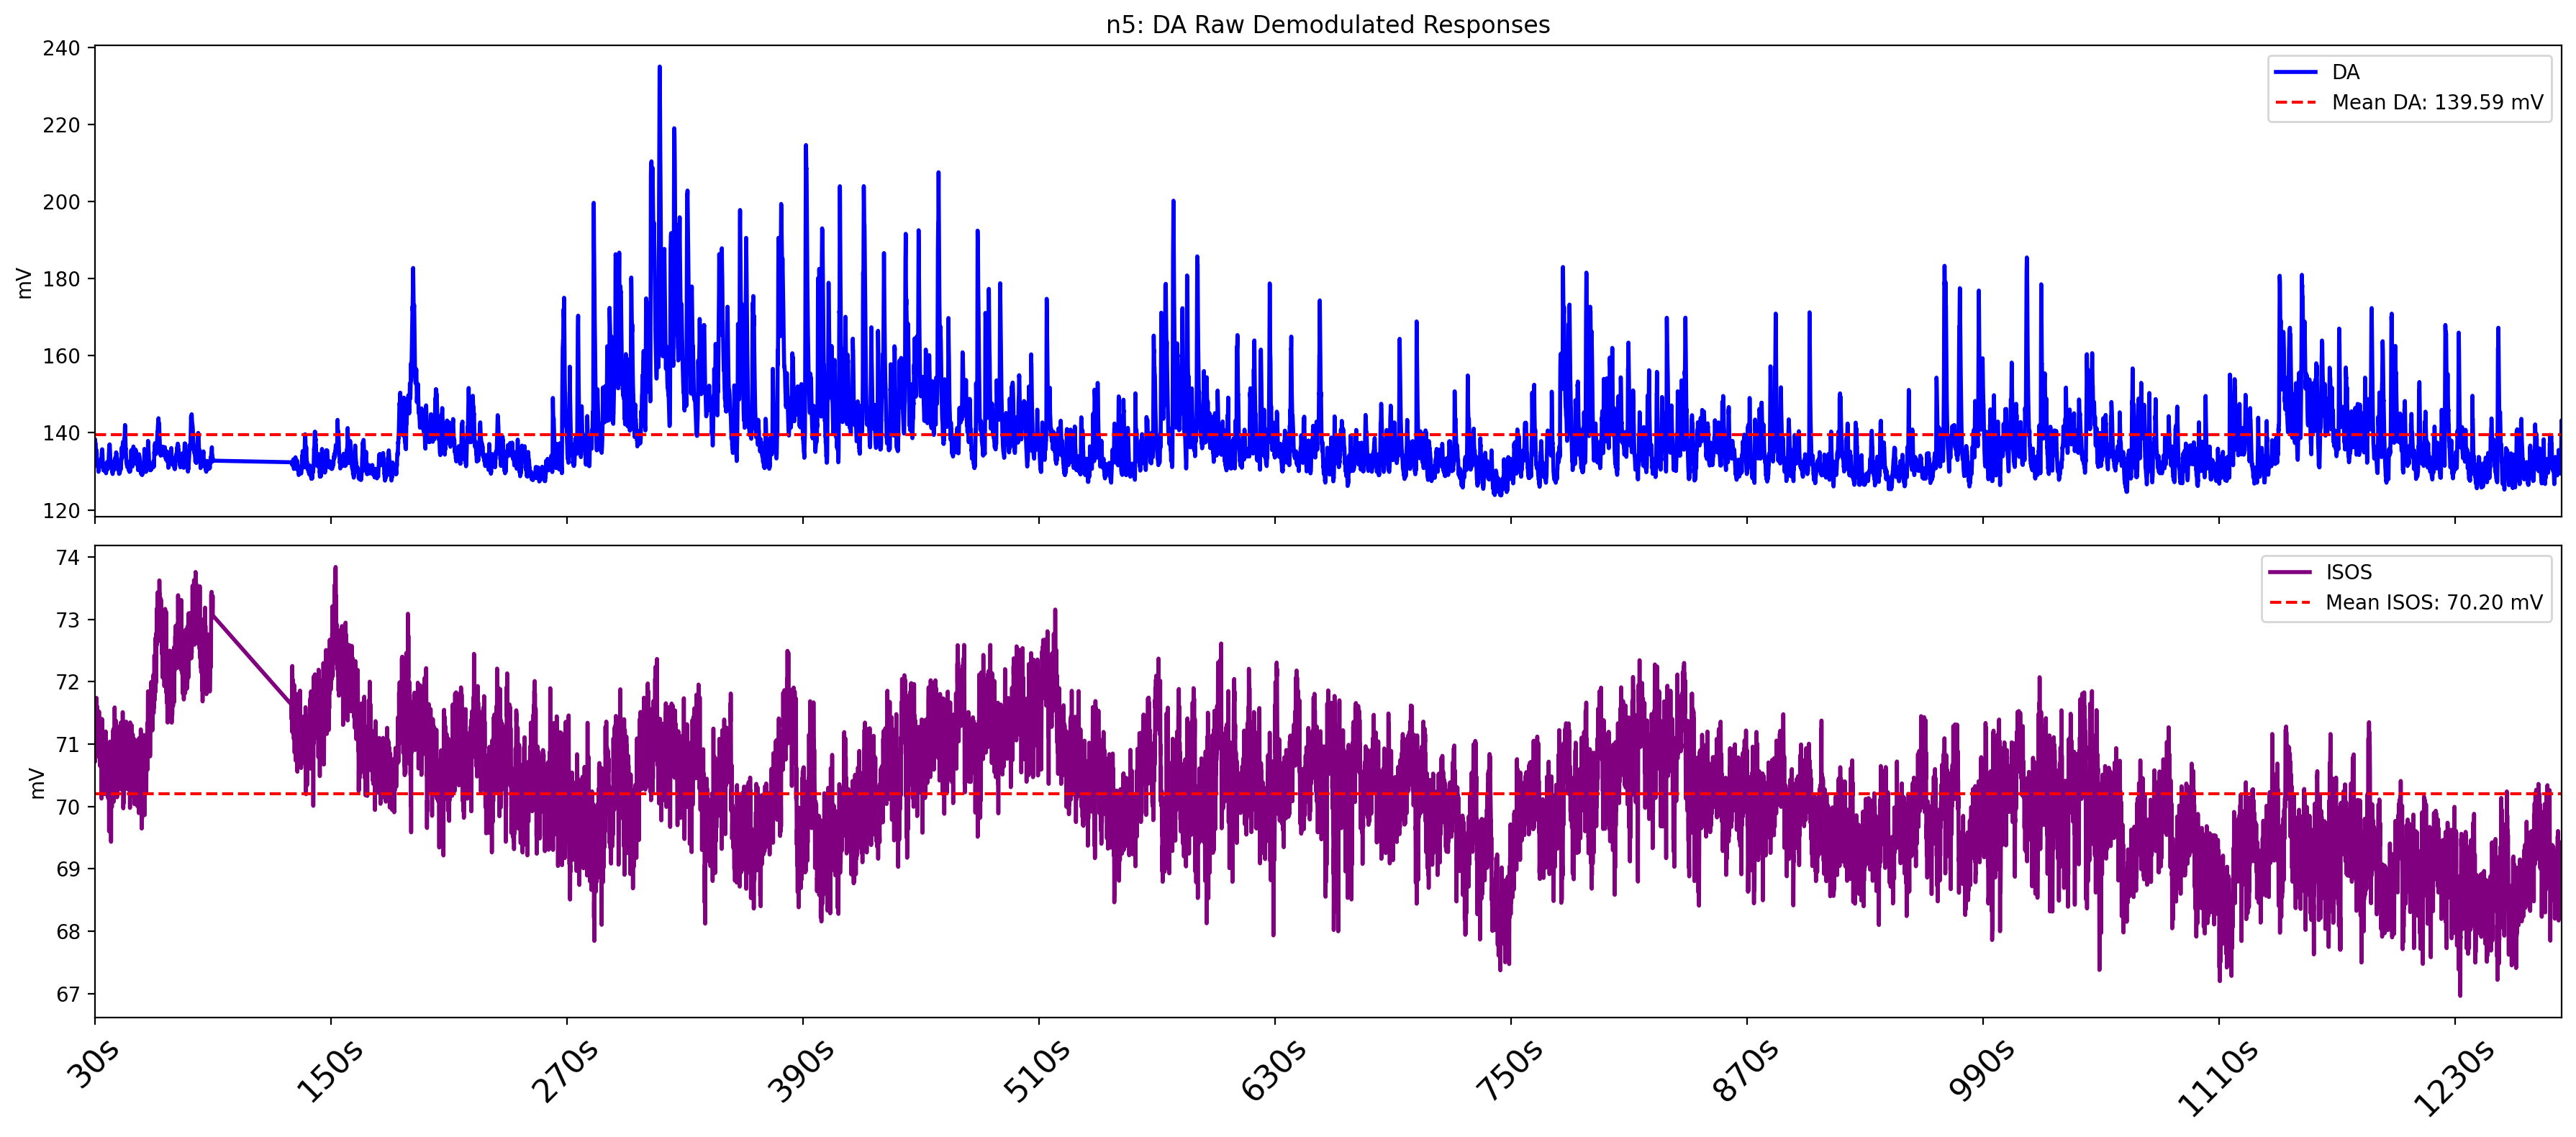

In [10]:
# Plot raw trace
tdt_data_obj.plot_signal('raw')

In [11]:
tdt_data_obj.smooth_and_apply(window_len=int(tdt_data_obj.fs)*2)

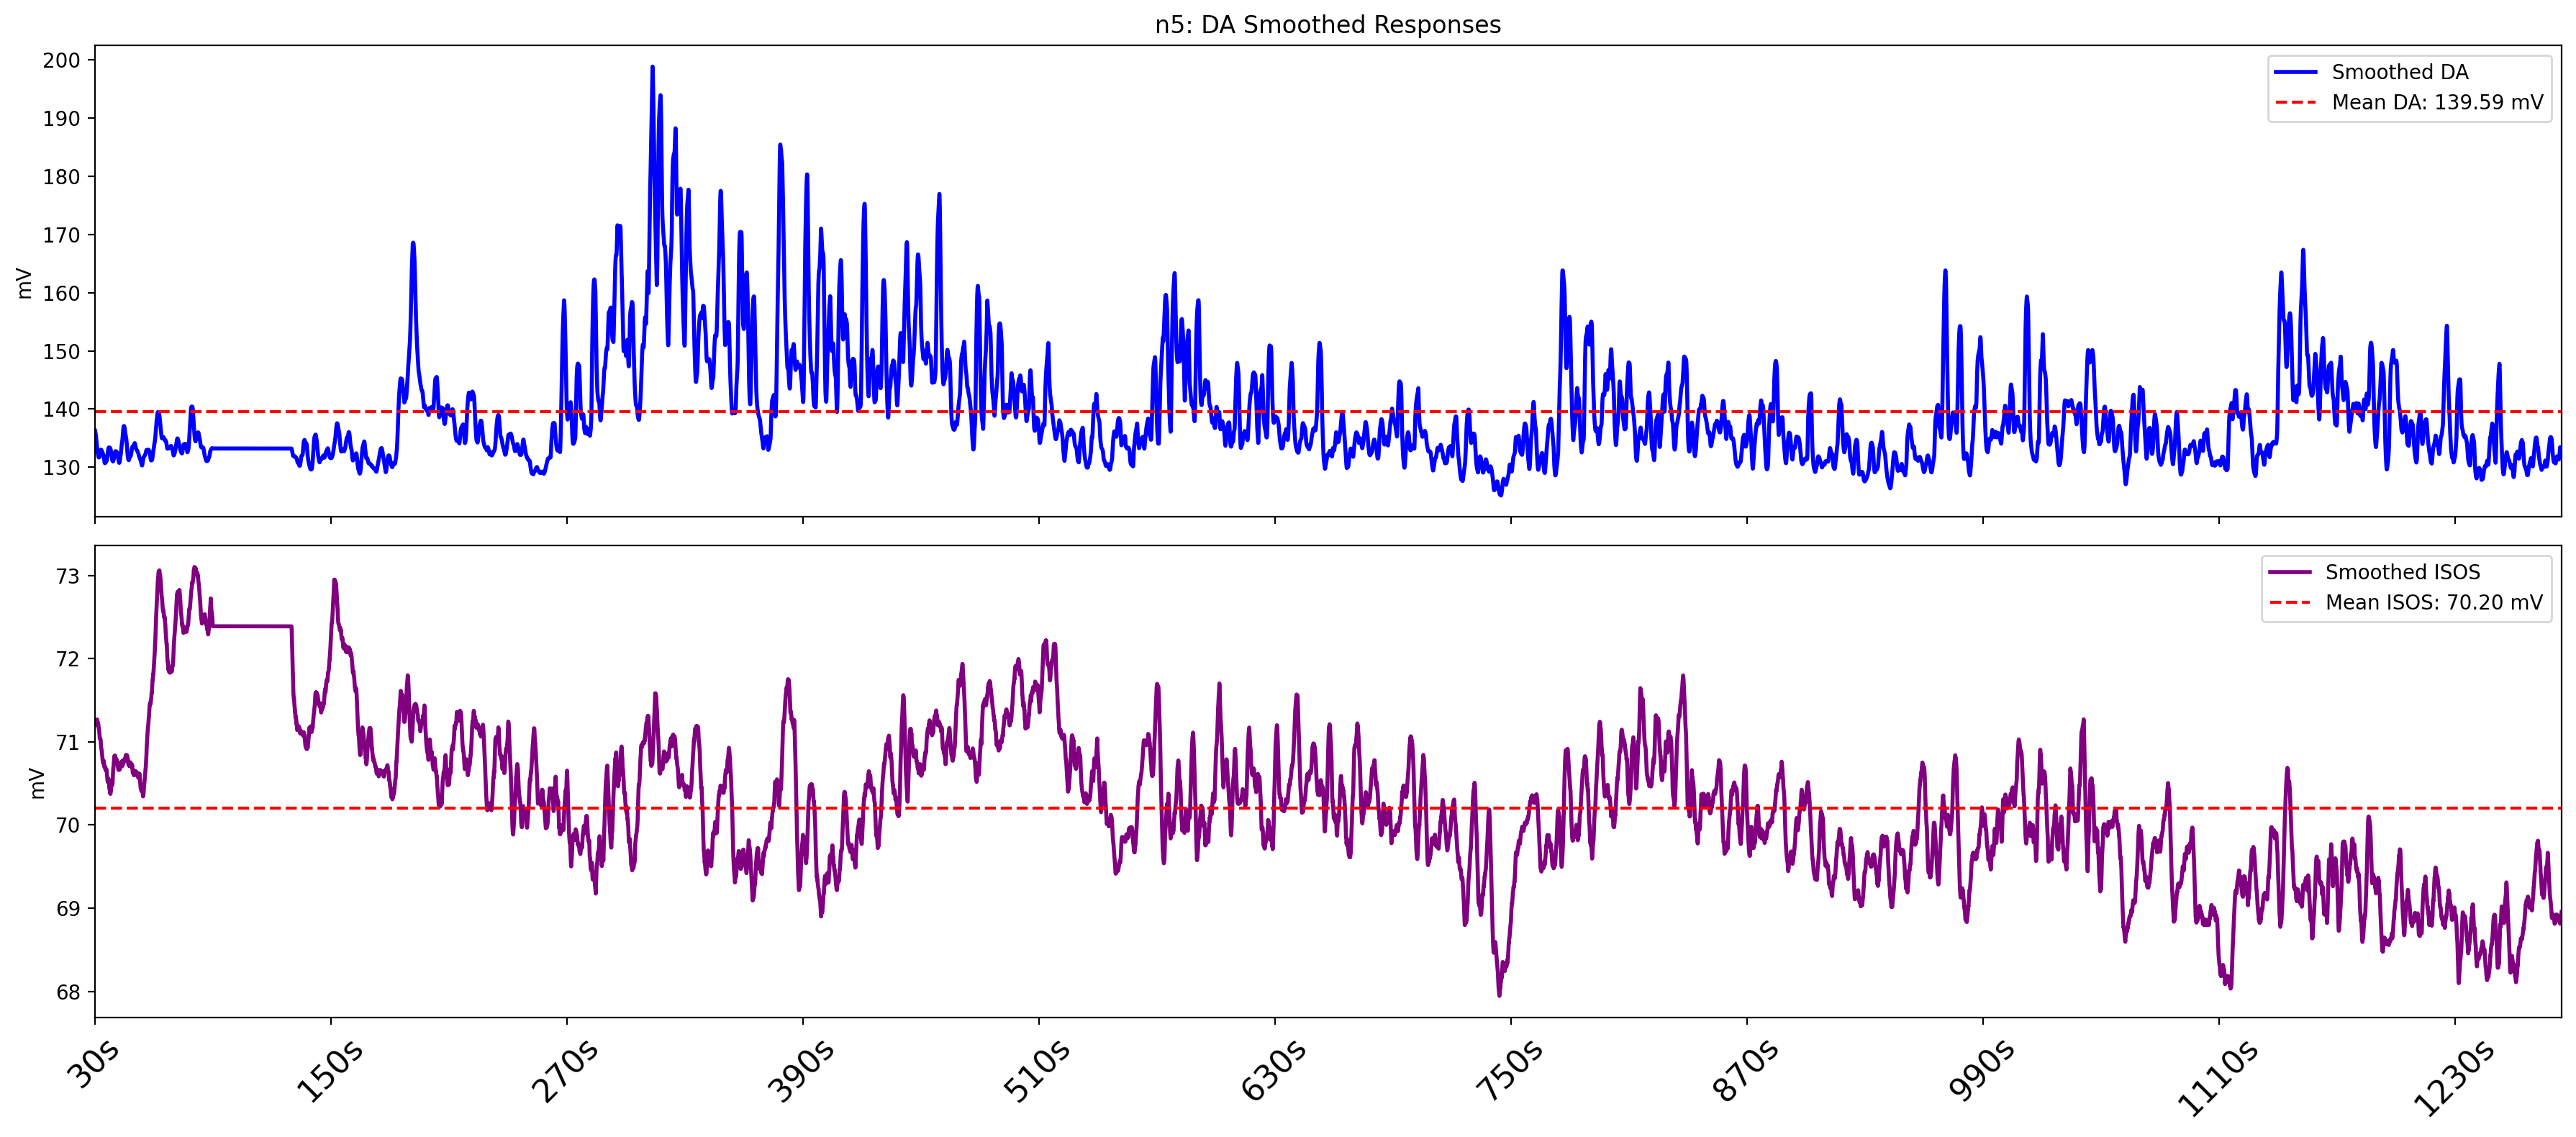

In [12]:
tdt_data_obj.plot_signal('smoothed')

In [13]:
# tdt_data_obj.apply_ma_baseline_correction()
tdt_data_obj.apply_ma_baseline_correction()

In [14]:
tdt_data_obj.DA_fc

array([132.64830891, 132.64830884, 132.64830871, ..., 131.97452984,
       131.9745297 , 131.9745297 ])

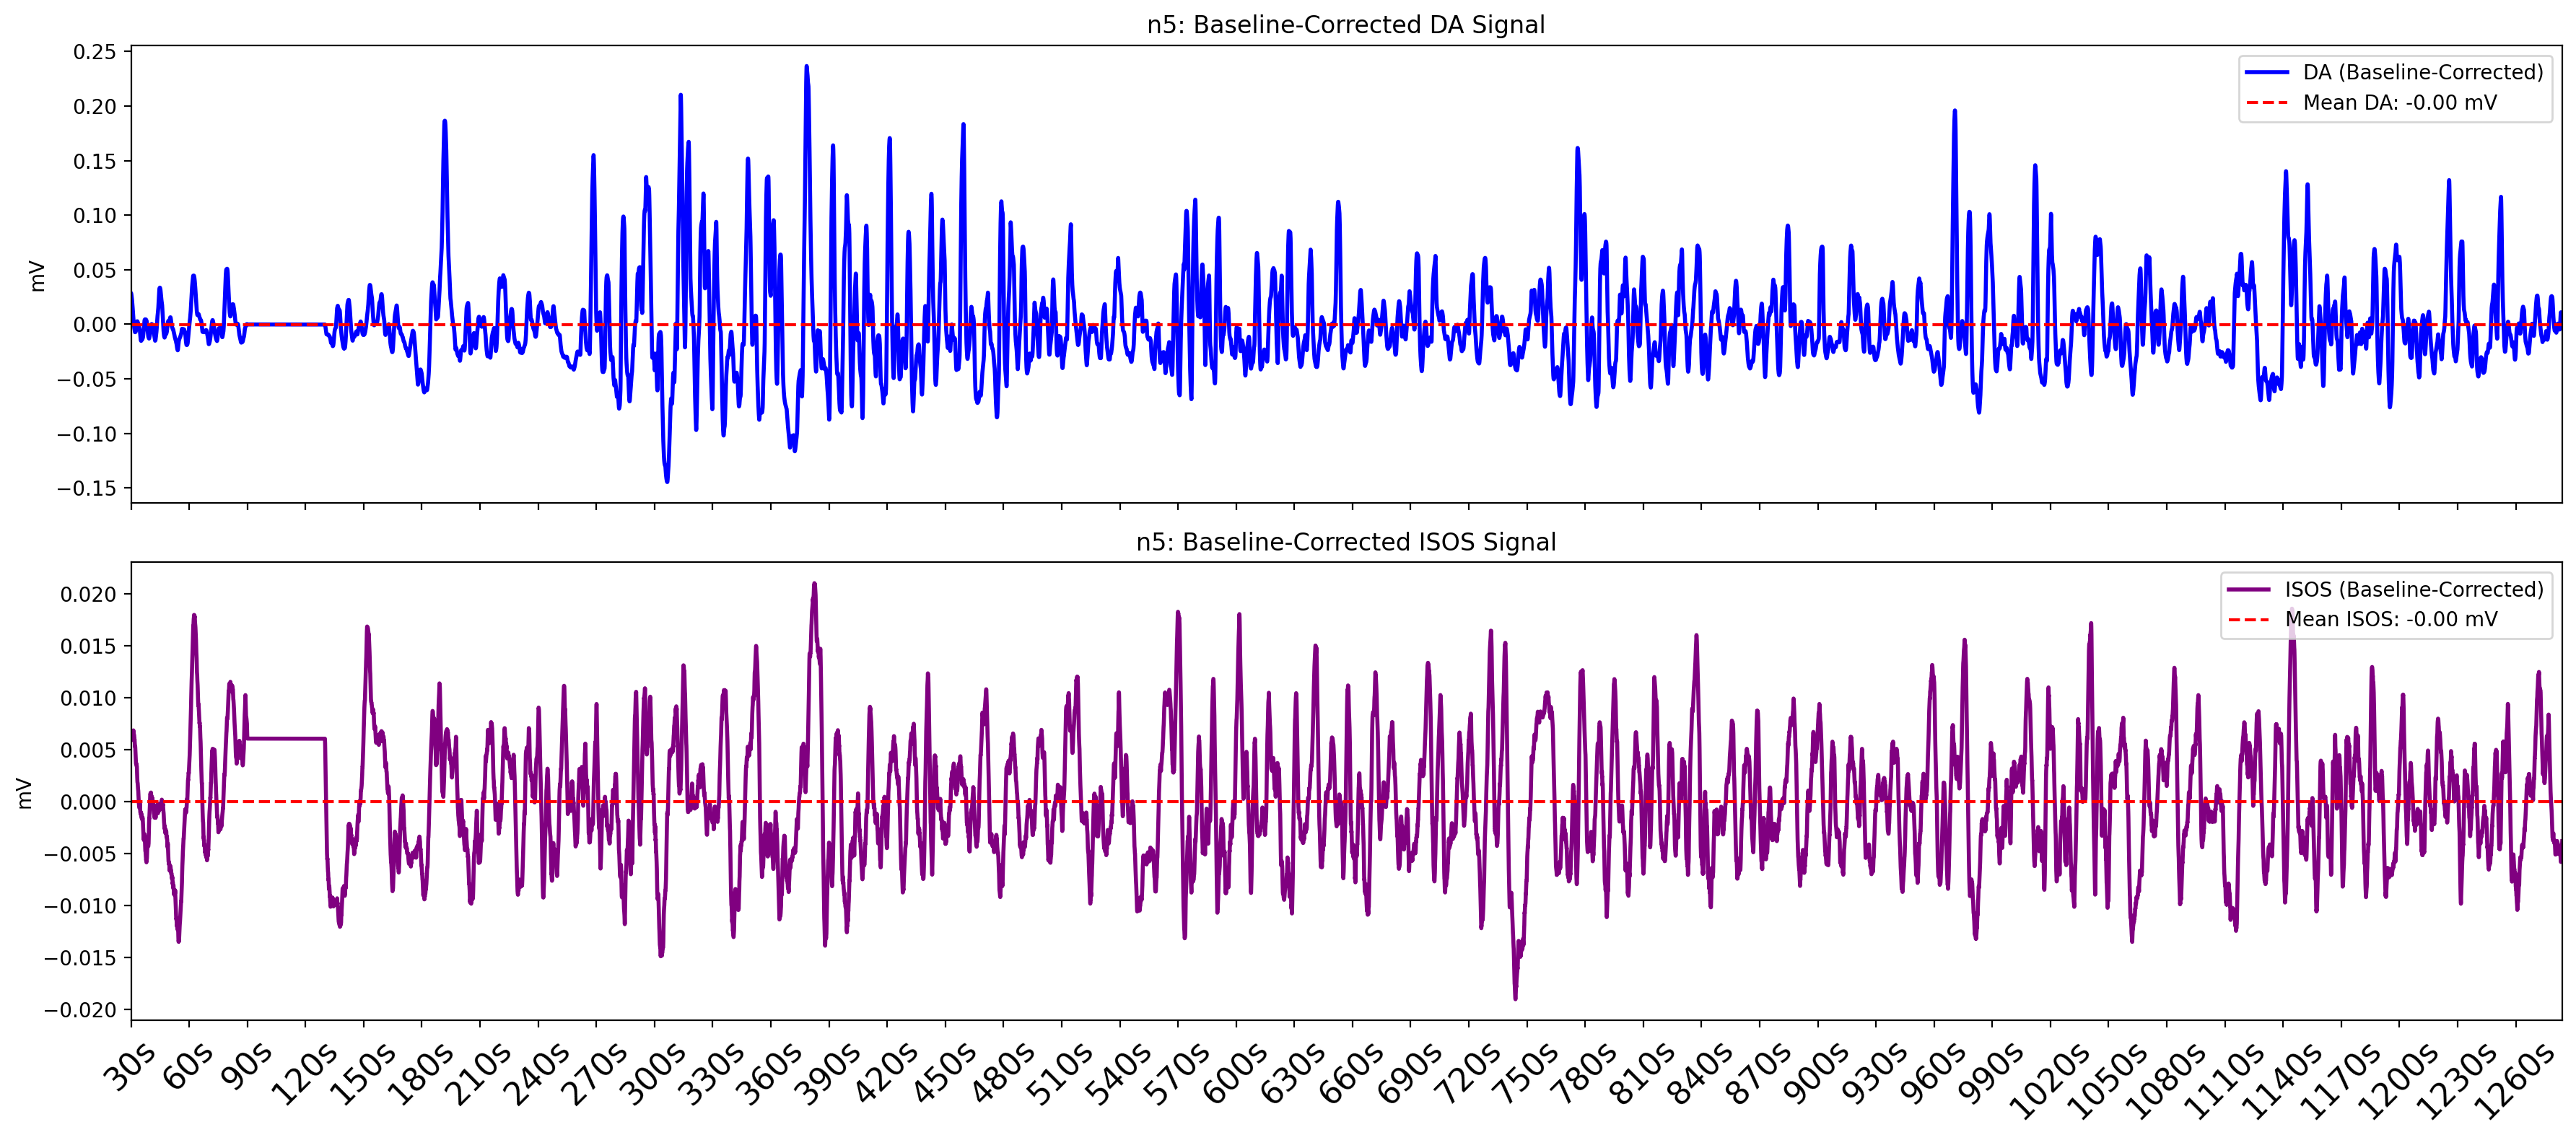

In [15]:
tdt_data_obj.plot_baseline_corrected_signal()

In [16]:
tdt_data_obj.perform_standardization()

In [17]:
tdt_data_obj.align_channels()

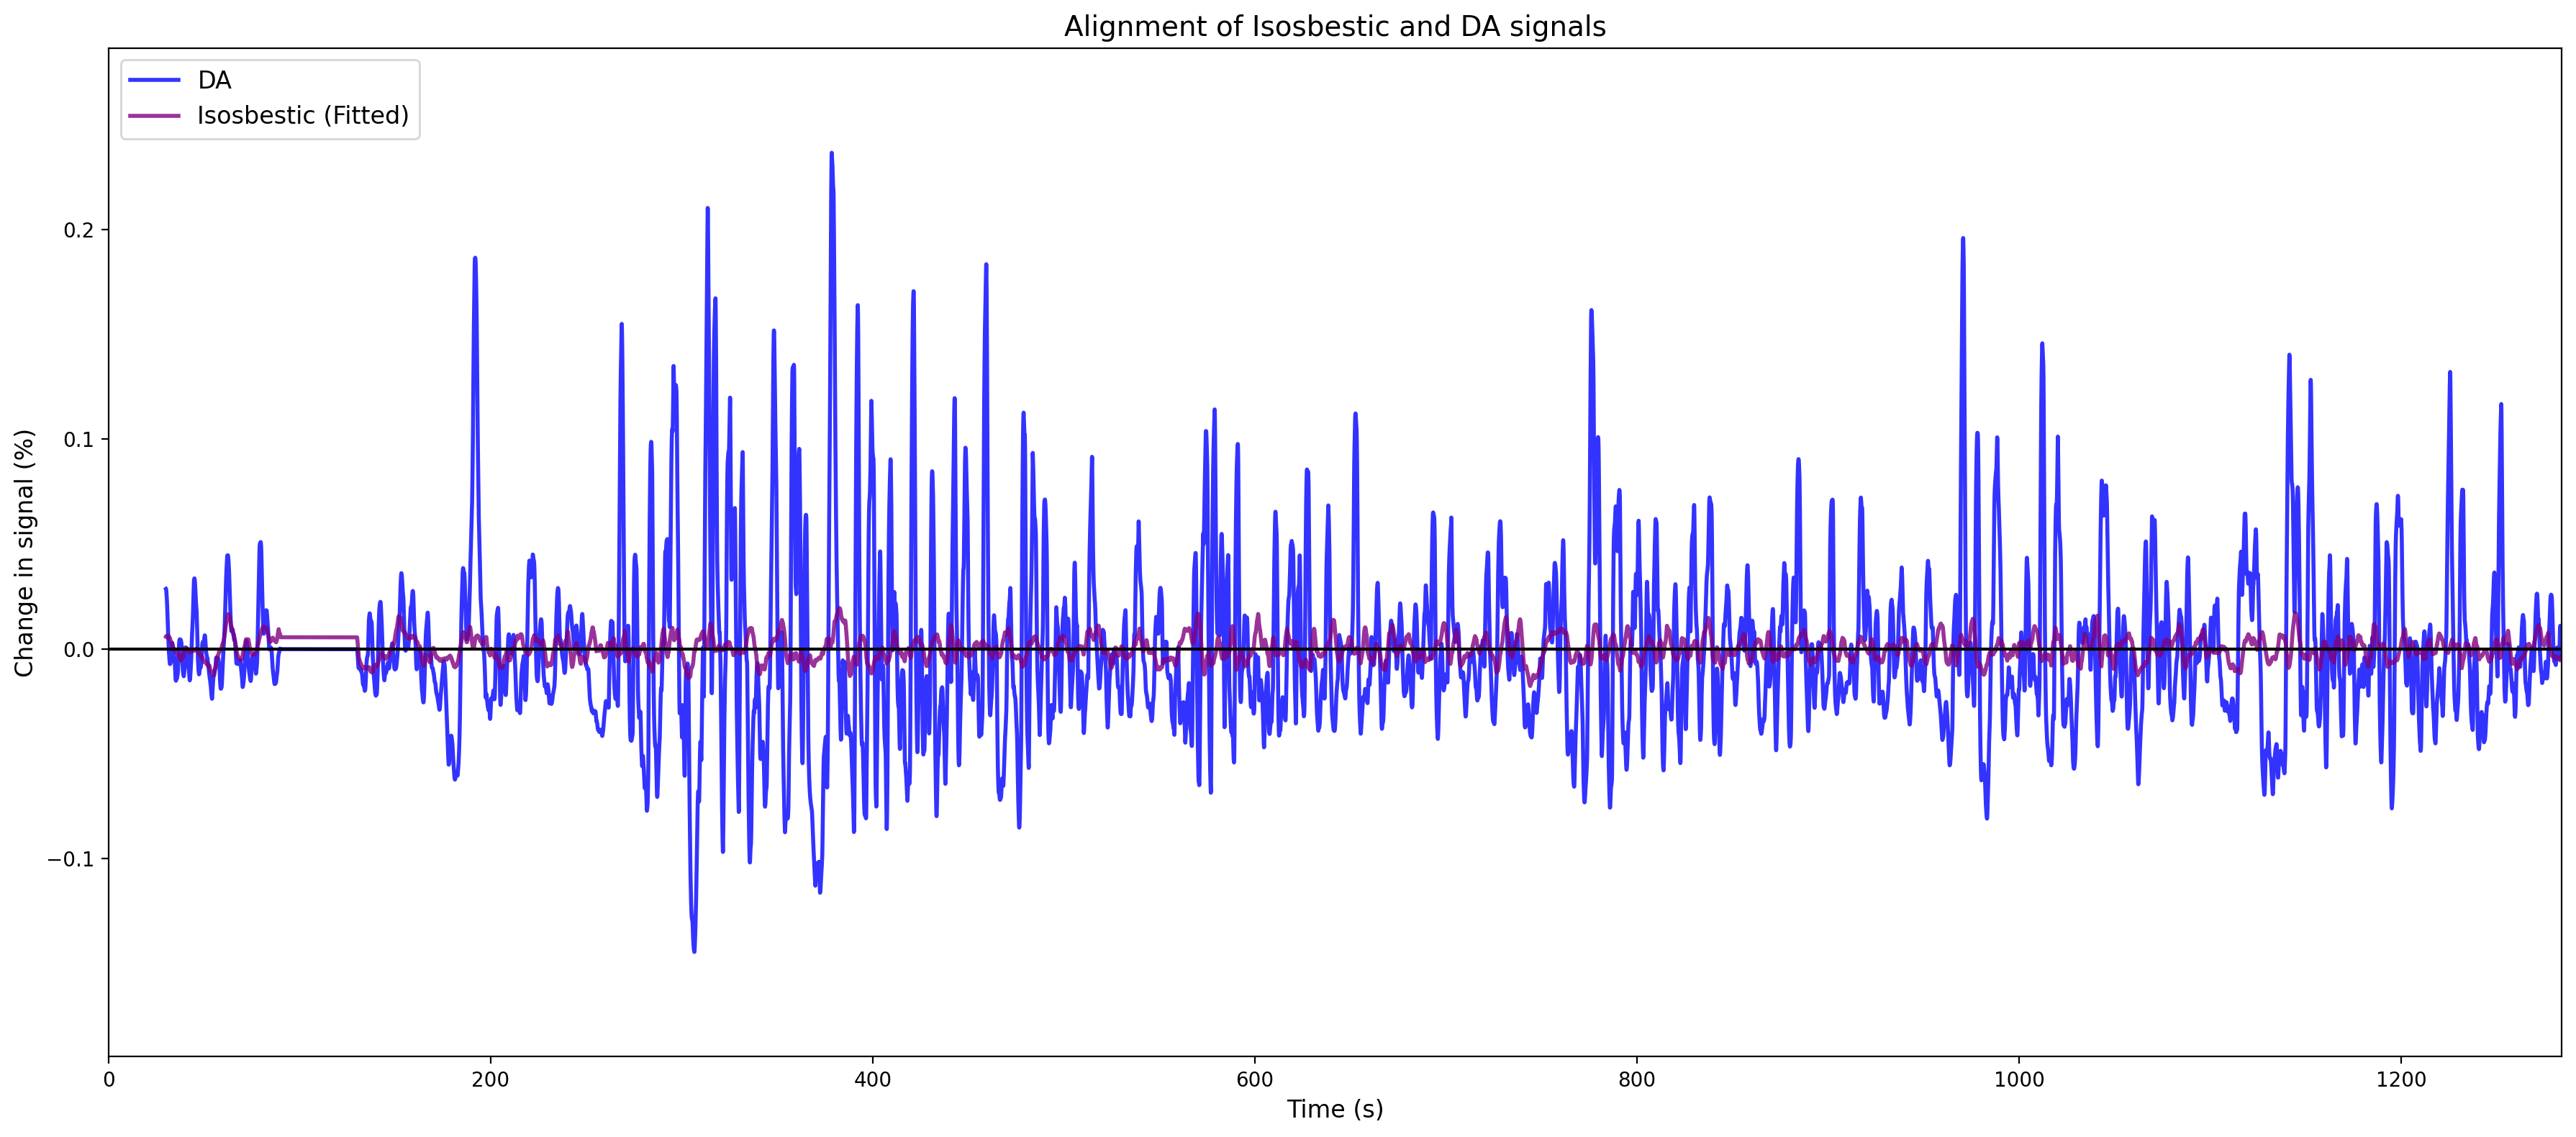

In [18]:
tdt_data_obj.plot_aligned_signals()

In [19]:
tdt_data_obj.compute_dFF()

array([0.02278576, 0.02278567, 0.02278549, ..., 0.0109746 , 0.01097441,
       0.01097441])

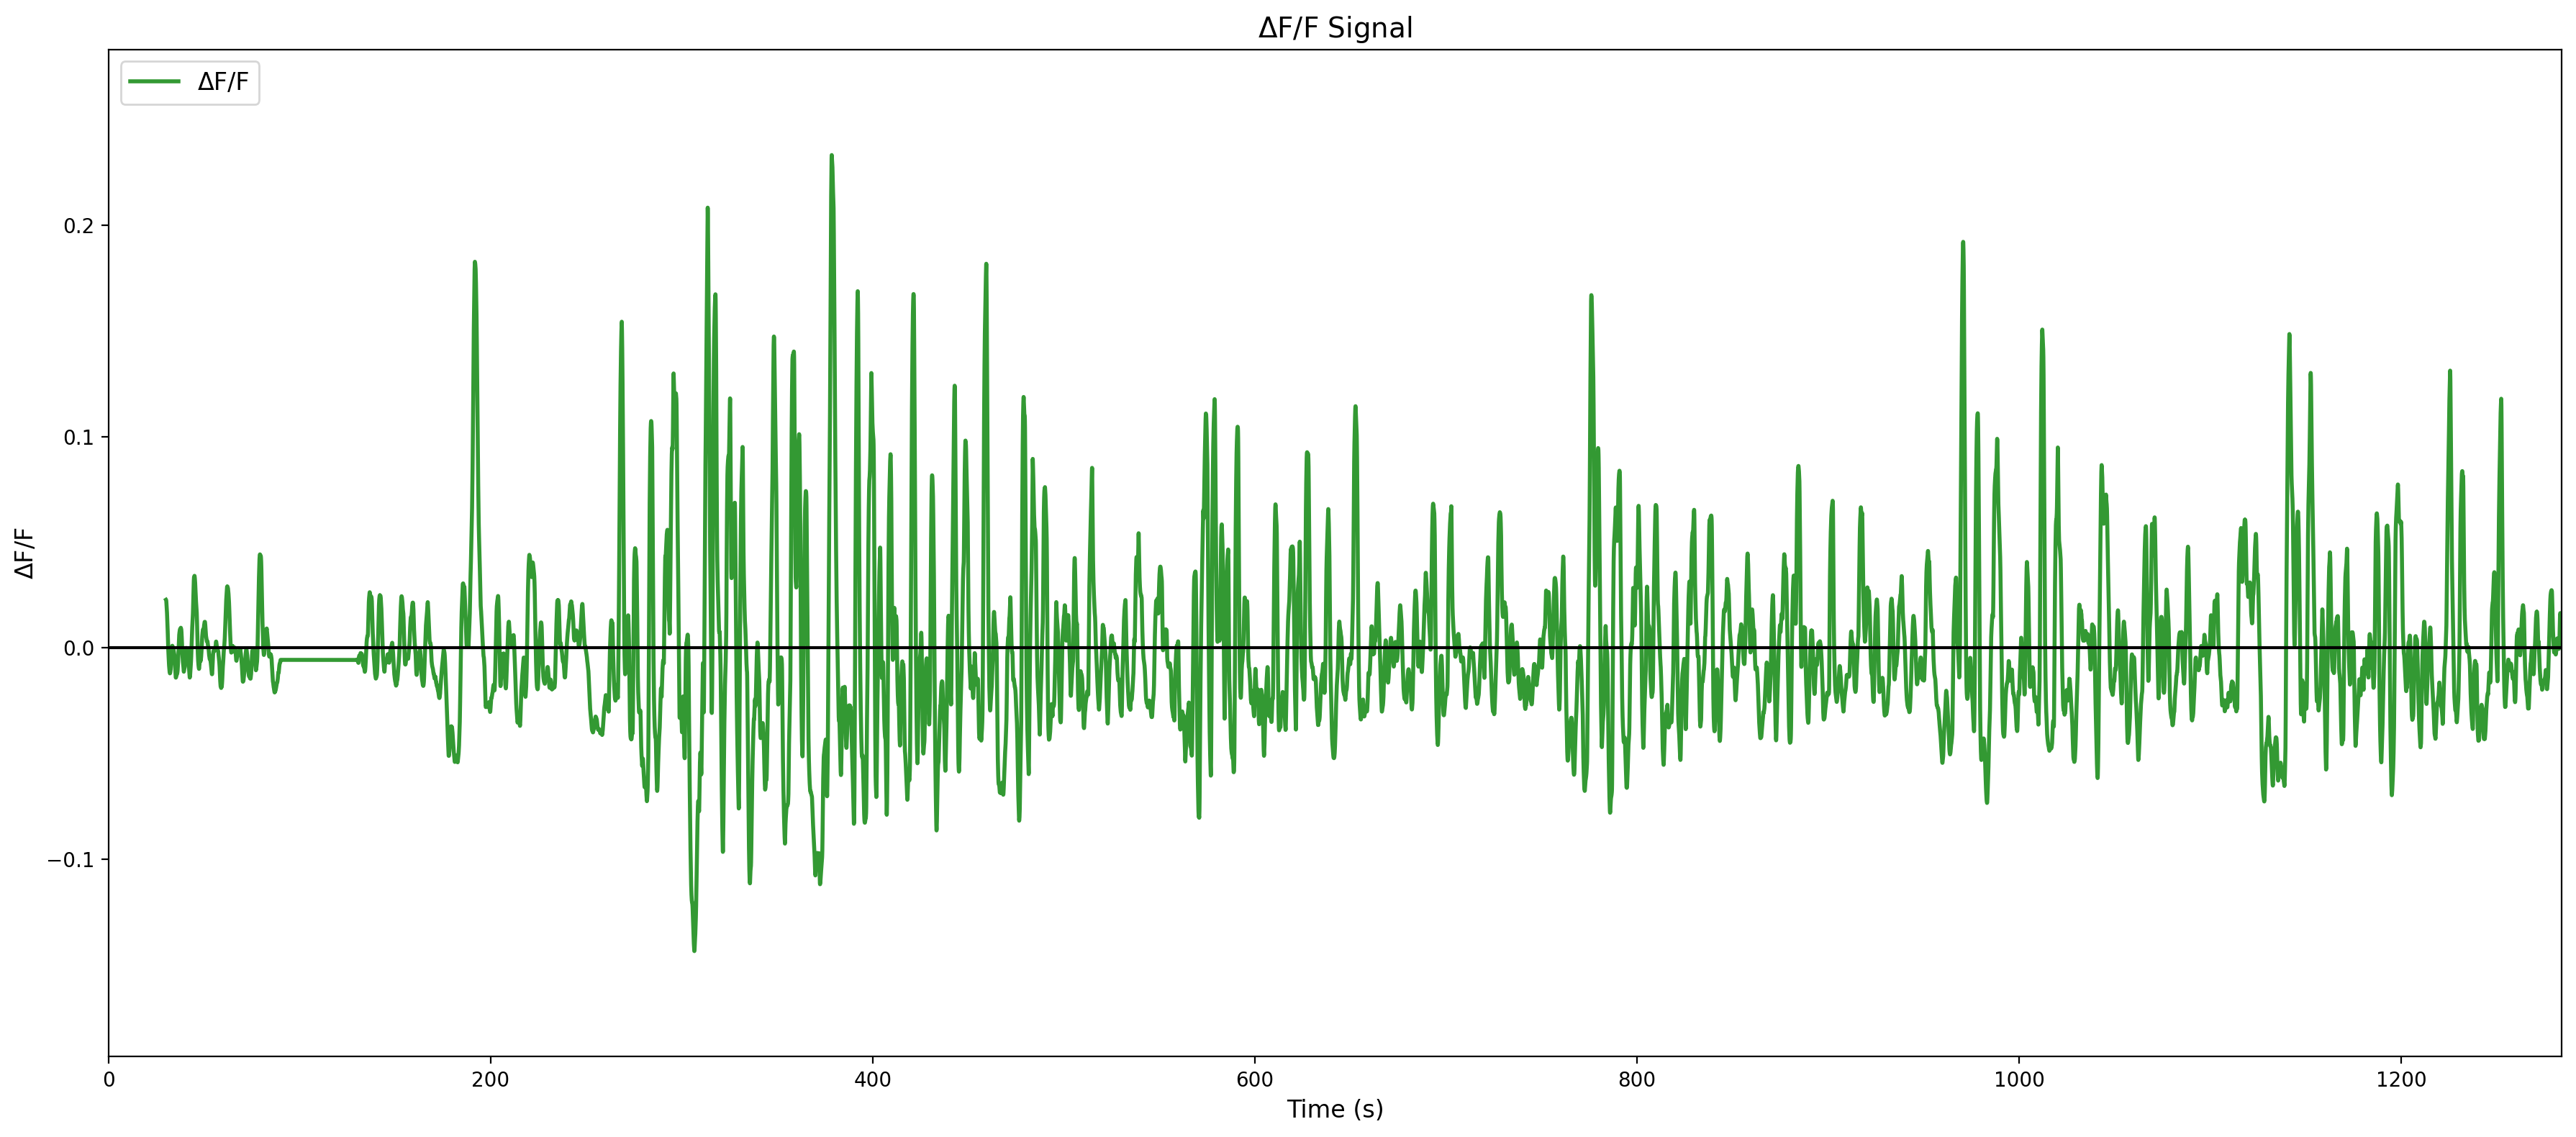

In [20]:
tdt_data_obj.plot_dFF()

In [21]:
tdt_data_obj.compute_zscore()

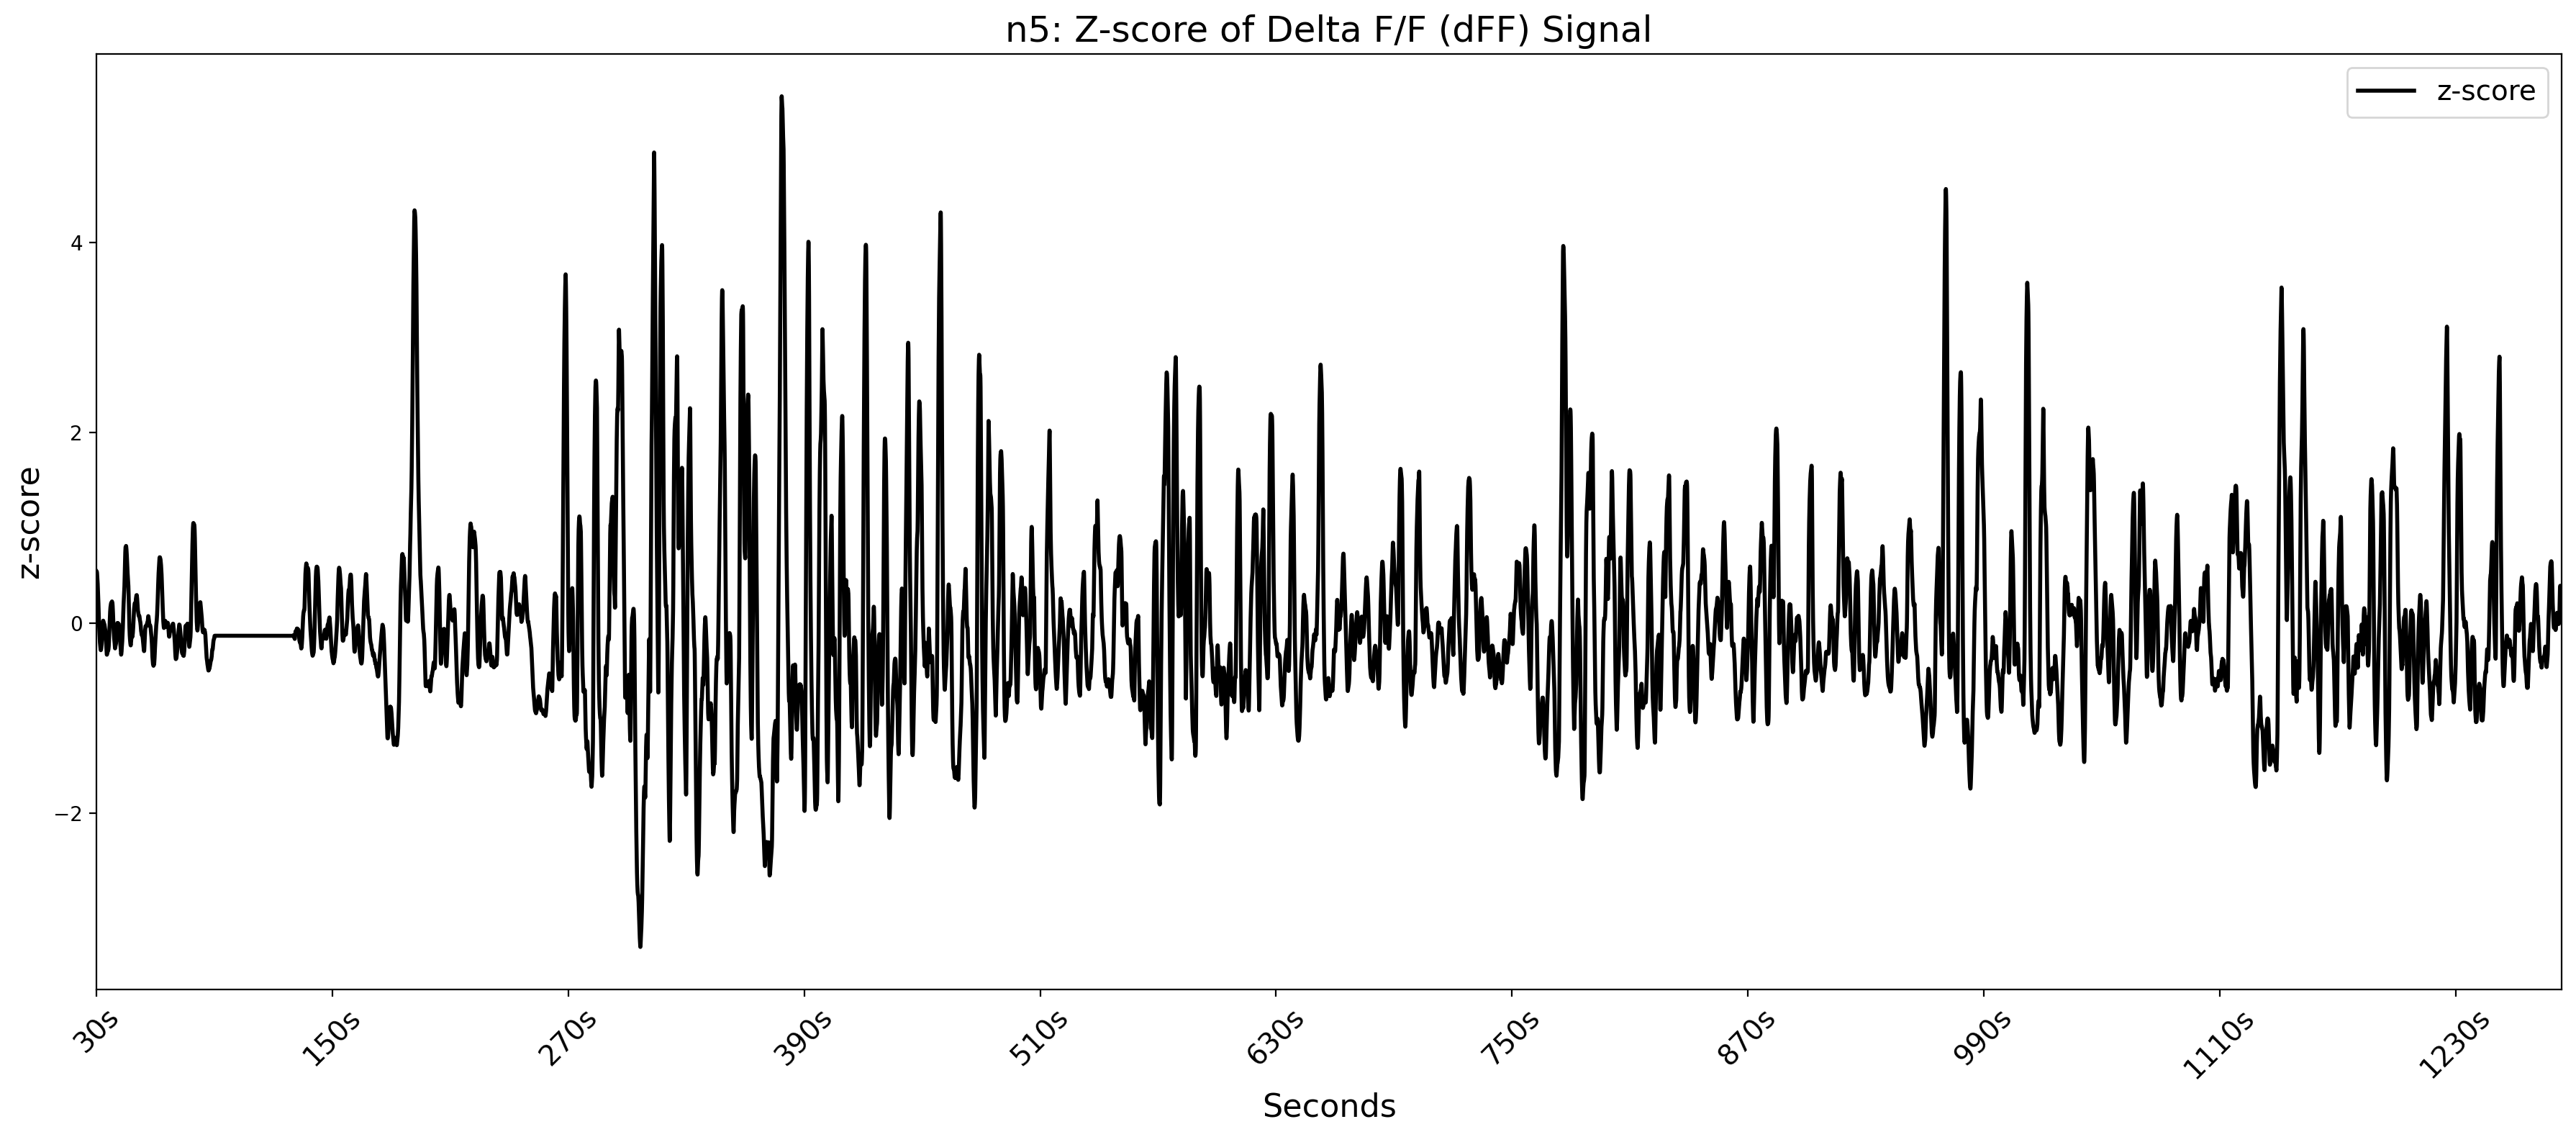

In [22]:
tdt_data_obj.plot_zscore()

## PETH

ValueError: Behavior event 'Investigation' not found in behaviors.

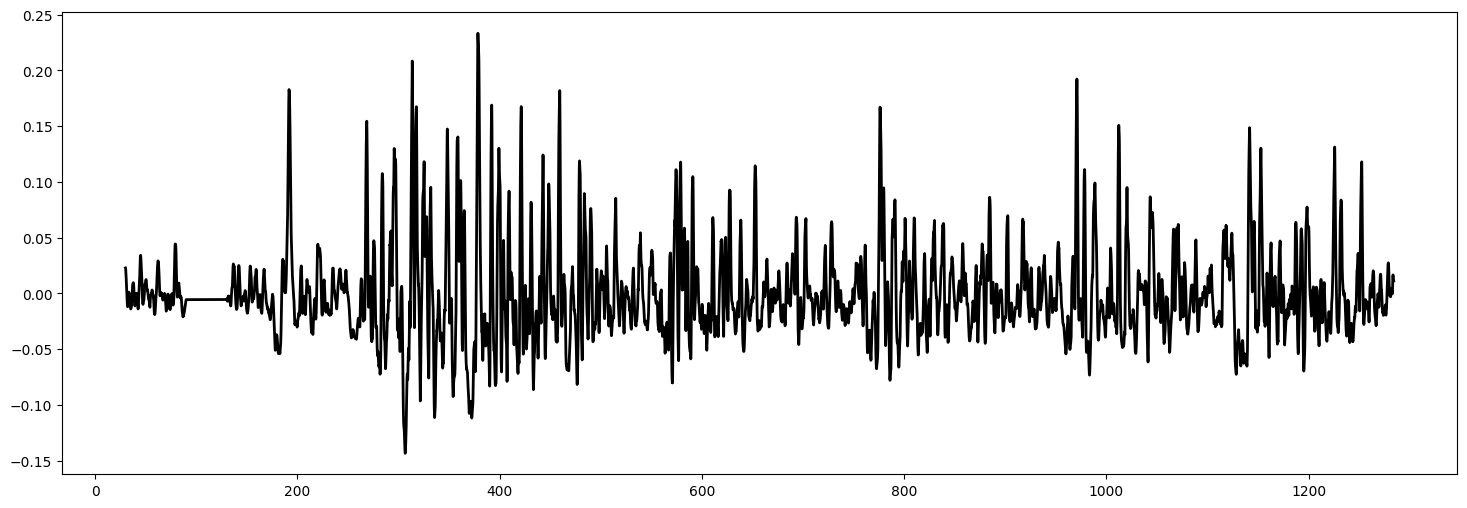

In [23]:
tdt_data_obj.plot_behavior_event(behavior_name='Investigation', plot_type='dFF')

In [22]:
tdt_data_obj.compute_first_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.05)

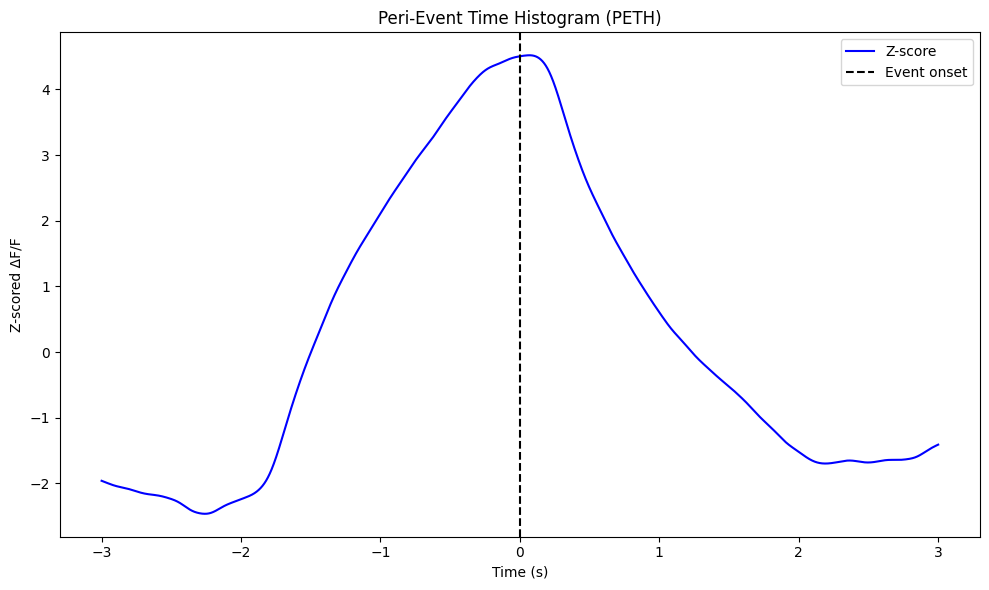

In [26]:
tdt_data_obj.plot_first_event_peth(signal_type='zscore')

In [27]:
tdt_data_obj.compute_1st_event_peth(behavior_name='Investigation', pre_time=3, post_time=3, bin_size=0.1)

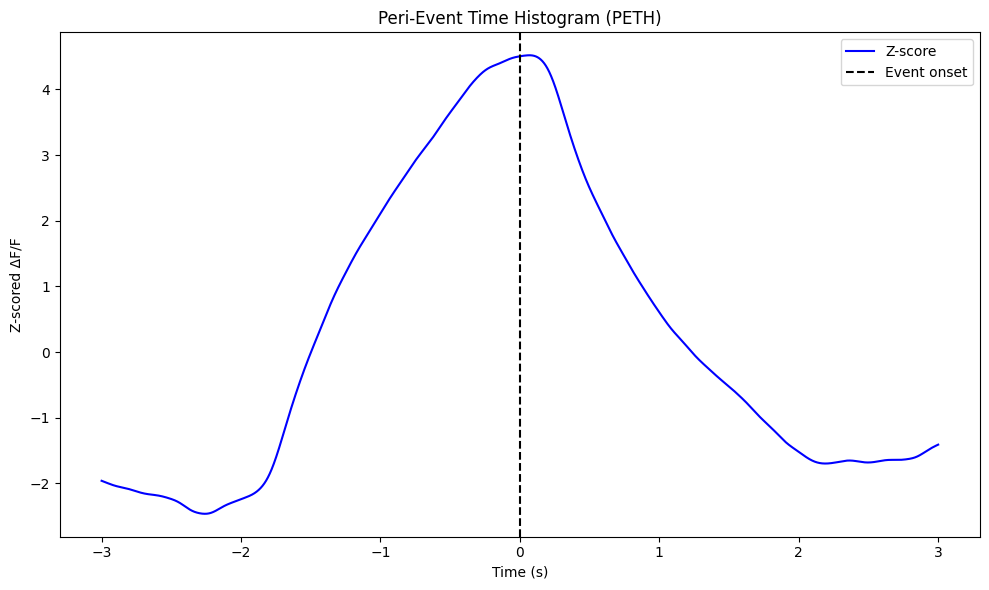

In [28]:
tdt_data_obj.plot_1st_event_peth(signal_type='zscore')

Old method

In [24]:
# # Downsample the data
# # tdt_data_obj.downsample_data(N = 16)

# # Compute dFF
# tdt_data_obj.compute_dff()
# tdt_data_obj.plot_signal('dFF')
# tdt_data_obj.compute_zscore()
# tdt_data_obj.print_behaviors()

## Mean DA during first of each behavior

In [25]:
# tdt_data_obj.hab_dishab_extract_intruder_bouts(csv_base_path)
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.smooth_signal()
# tdt_data_obj.hab_dishab_plot_behavior_event(behavior_name='all', plot_type='dFF')
# tdt_data_obj.hab_dishab_find_behavior_events_in_bout()
# # tdt_data_obj.hc_get_first_behavior()
# tdt_data_obj.bout_dict